# TODO
- ~~categorical select relevant~~
- ~~categorical plot more from relevant~~
- ~~numerical add more categorical~~
- gini index
- correlation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde
import numpy as np

plt.style.use('ggplot')

# Collecting initial data

we are using __existing data__, provided by the contractor as part of the project.

we can find in the dataset 79 unique attributes.

# Describe data

In [3]:
data = pd.read_csv('train.csv', ',')

data

C:\Users\yiche\AppData\Local\Temp\ipykernel_13308\3378811120.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('train.csv', ',')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Amount of data

In [4]:
display(data.size, data.info)

118260

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

## Value types

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Coding scheme

no enconding conflict found, because it's provided by the contractor and probably has been cleaned before hand.

**in the data description we have an explanation of all data meaning which is really nice**

In [7]:
for column in data.columns:
    if (len(data[column].unique()) <= 10):
        print(column, ' : ', data[column].unique())
    else:
        print(column, ' : ', data[column].dtypes)

Id  :  int64
MSSubClass  :  int64
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage  :  float64
LotArea  :  int64
Street  :  ['Pave' 'Grvl']
Alley  :  [nan 'Grvl' 'Pave']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  object
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  :  [5 8 6 7 4 2 3 9 1]
YearBuilt  :  int64
YearRemodAdd  :  int64
RoofStyle  :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl  :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior

### Missing Values ?

TODO

- check NA values
- change object dtypes in categorical

In [8]:
for column in data.columns:
    if not data[column].isna().sum() == 0:
        print('column with missing values', column, ':', data[column].isna().sum(), '| type :', data[column].dtypes)

# values with missing values :
# LotFrontage
# MasVnrType
# MasVnrArea
# Electrical
# GrarageYrBlt

column with missing values LotFrontage : 259 | type : float64
column with missing values Alley : 1369 | type : object
column with missing values MasVnrType : 8 | type : object
column with missing values MasVnrArea : 8 | type : float64
column with missing values BsmtQual : 37 | type : object
column with missing values BsmtCond : 37 | type : object
column with missing values BsmtExposure : 38 | type : object
column with missing values BsmtFinType1 : 37 | type : object
column with missing values BsmtFinType2 : 38 | type : object
column with missing values Electrical : 1 | type : object
column with missing values FireplaceQu : 690 | type : object
column with missing values GarageType : 81 | type : object
column with missing values GarageYrBlt : 81 | type : float64
column with missing values GarageFinish : 81 | type : object
column with missing values GarageQual : 81 | type : object
column with missing values GarageCond : 81 | type : object
column with missing values PoolQC : 1453 | type : 

# Explore Data

## Column 1 to 20 Data types

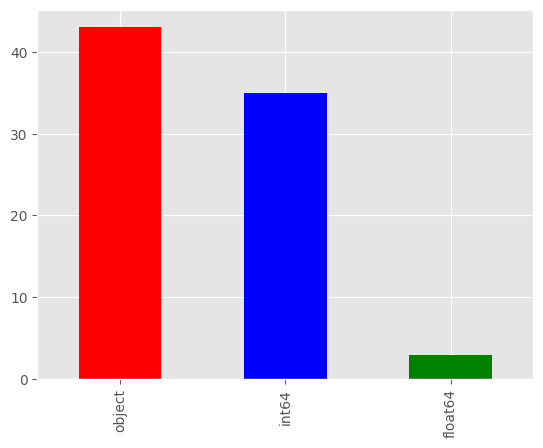

In [9]:
data.dtypes.value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'])
plt.show()

In [10]:
# 0 for ID

data.dtypes[1:21]

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
dtype: object

## Adding low medium high values

it will be in PriceType column

In [11]:
data['PriceType'] = np.where(
                            data['SalePrice'] >= 300000,
                            'HIGH',
                            np.where(
                                data['SalePrice'] <= 150000,
                                'LOW',
                                'MEDIUM'
                                )
                            )

In [12]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceType
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,MEDIUM
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,MEDIUM
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,MEDIUM
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,LOW
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,MEDIUM
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,MEDIUM
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,MEDIUM
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,LOW


### Quick Analysis of PriceType

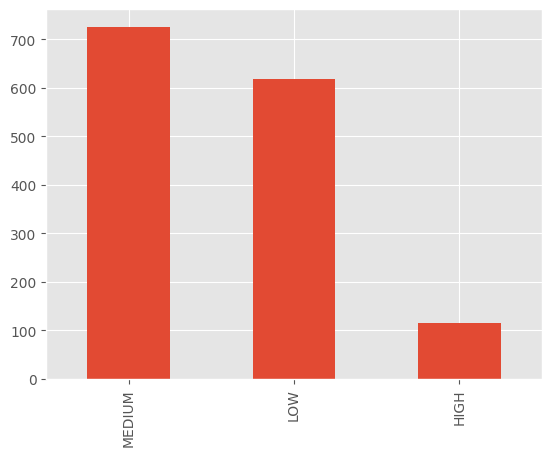

In [13]:
data['PriceType'].value_counts().plot(kind = 'bar')
plt.show()

## Categorical plot

In [14]:
def data_show_categorical(attribute, title=None):
    # previous plots
    #plt.rcParams.update({'font.size': 5})
    #data['SalePrice'].hist(by=data[attribute])

    data[attribute].value_counts().plot(kind = 'bar')
    plt.show()
    data.groupby([attribute, 'PriceType']).size().unstack().plot(kind='bar', stacked=True, title=title)

def data_show_categorical_compare(attribute, attribute2, title=None):
    data.groupby([attribute, 'PriceType', attribute2]).size().unstack().plot(kind='bar', stacked=True, title=title)




## Categorical not intersting

### MSSubClass

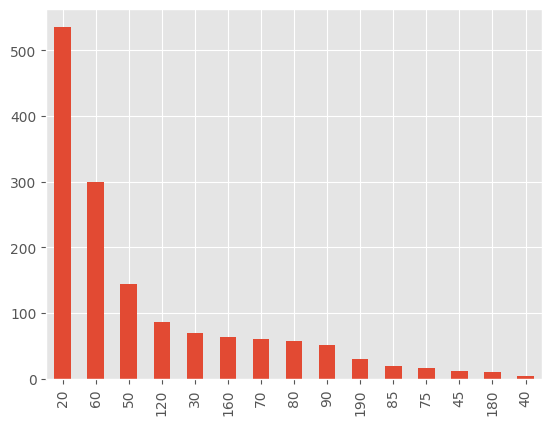

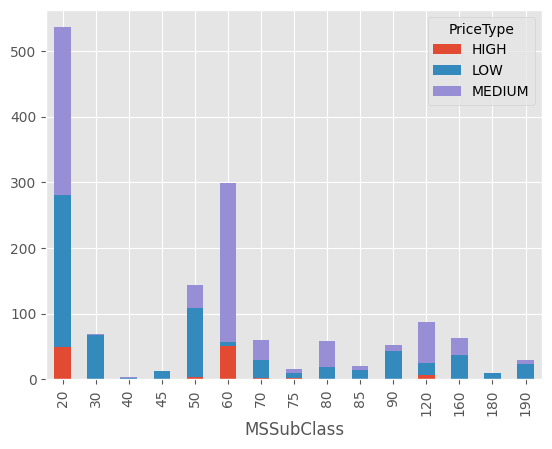

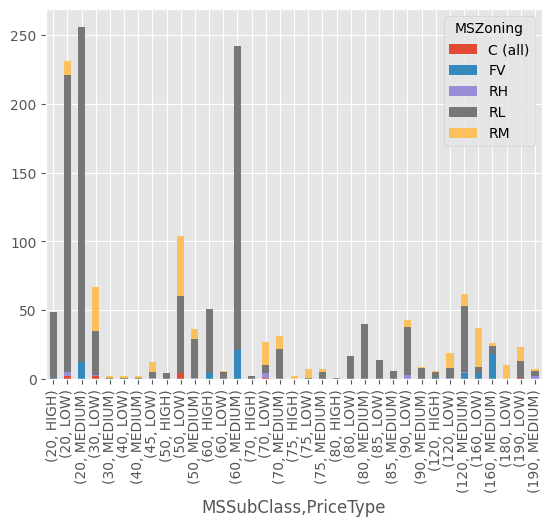

In [15]:
data_show_categorical('MSSubClass')
data_show_categorical_compare('MSSubClass', 'MSZoning')

### MSZoning

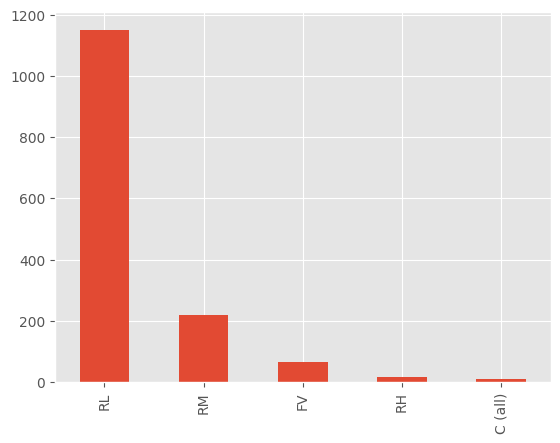

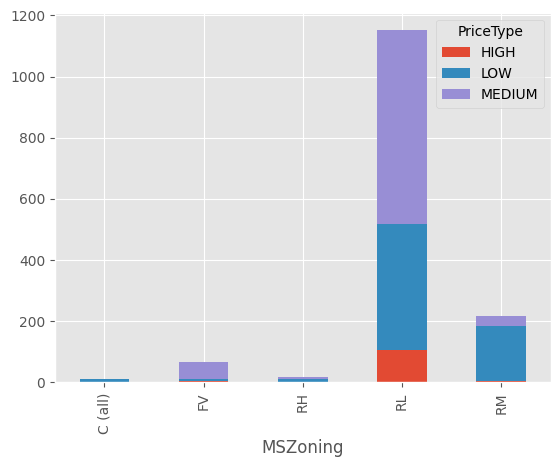

In [16]:
data_show_categorical('MSZoning')

### Street

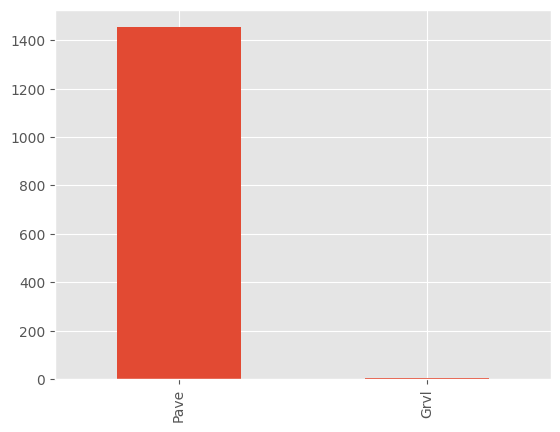

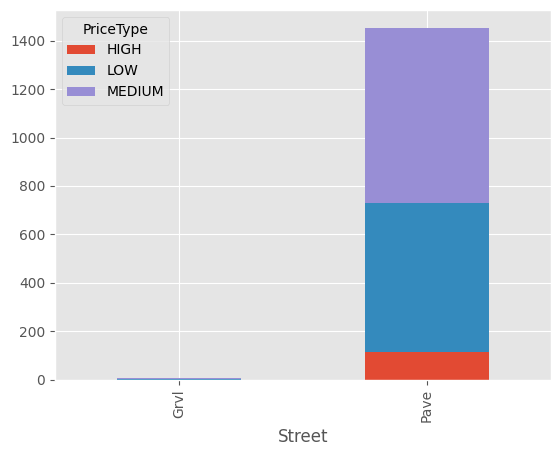

In [17]:
data_show_categorical('Street')

### LandContour

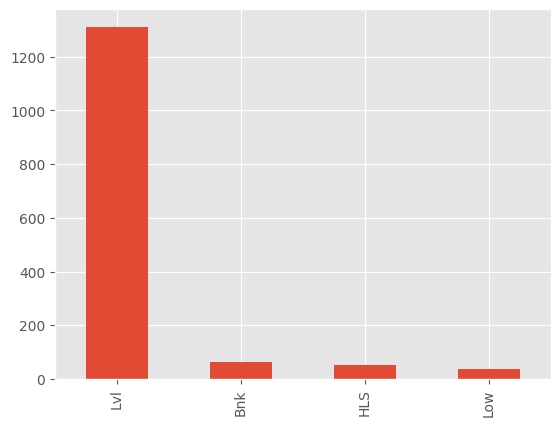

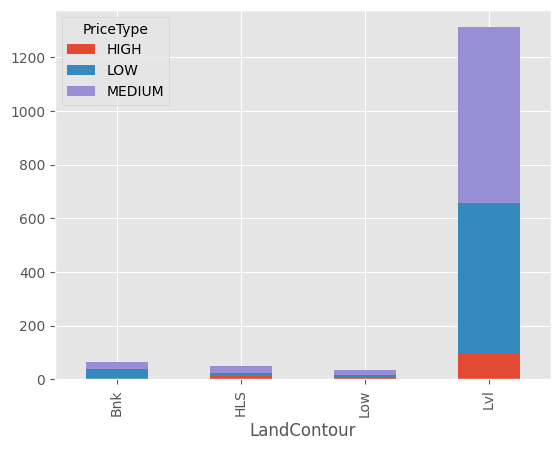

In [18]:
data_show_categorical('LandContour')

### Condition1

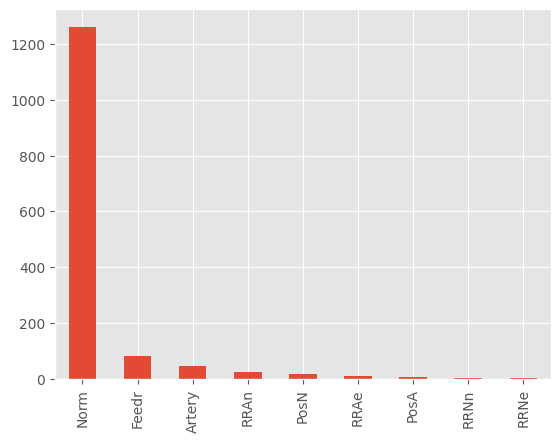

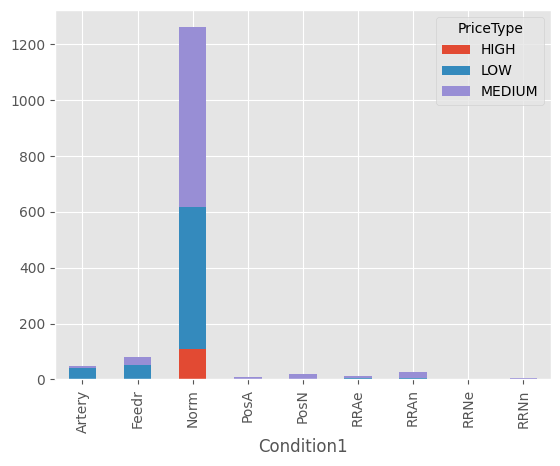

In [19]:
data_show_categorical('Condition1')

### Condition2

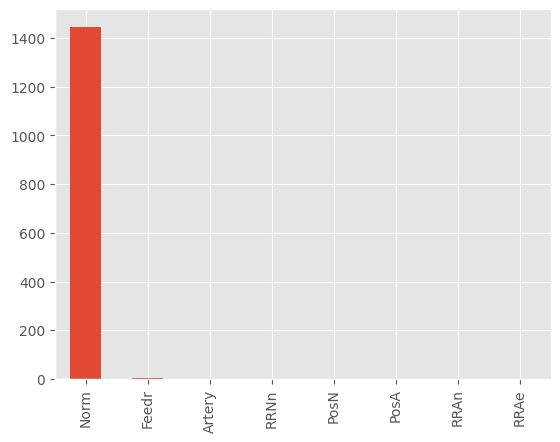

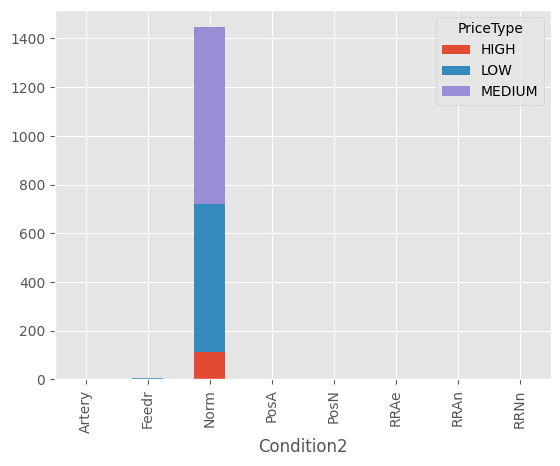

In [20]:
data_show_categorical('Condition2')

### Utilities

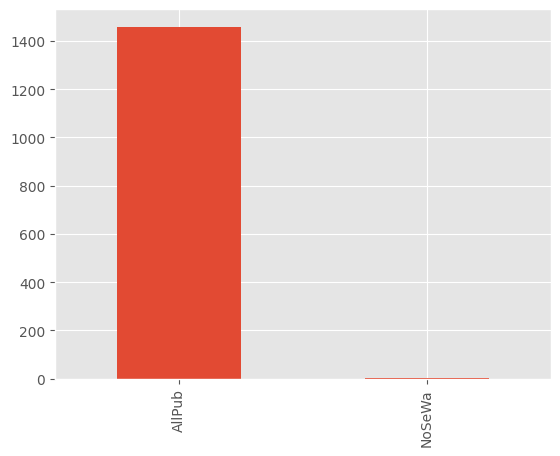

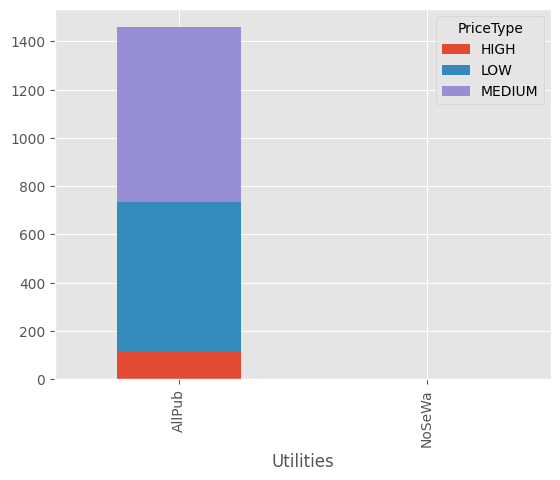

In [21]:
data_show_categorical('Utilities')

### Neighborhood

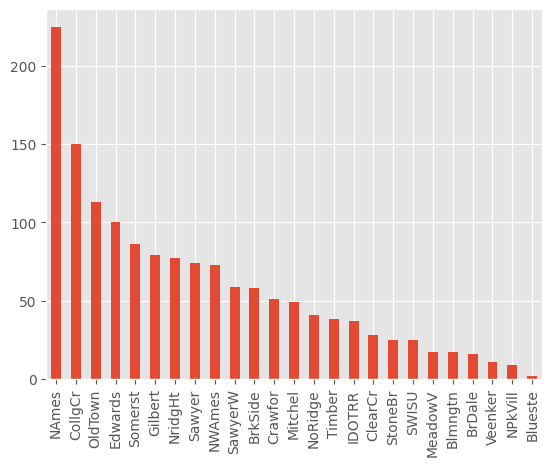

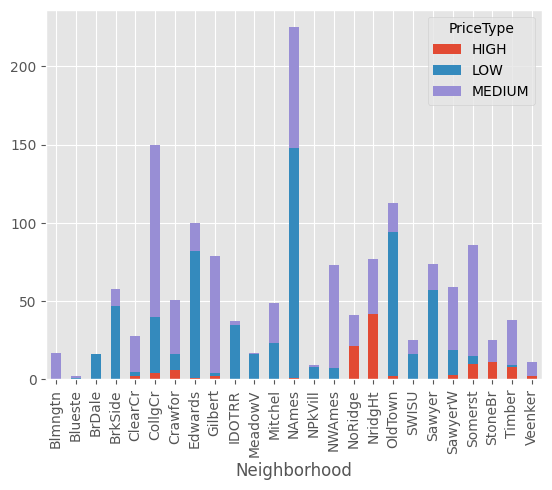

In [22]:
data_show_categorical('Neighborhood')

### LandSlope

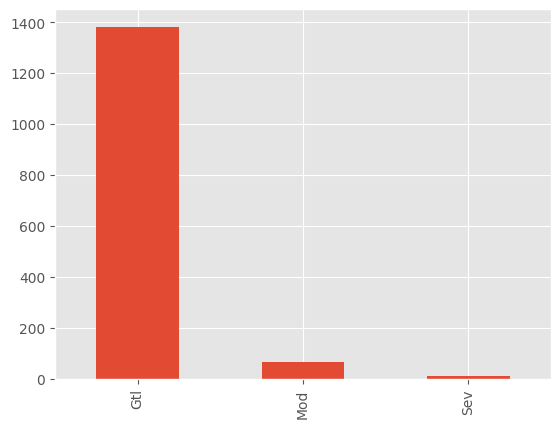

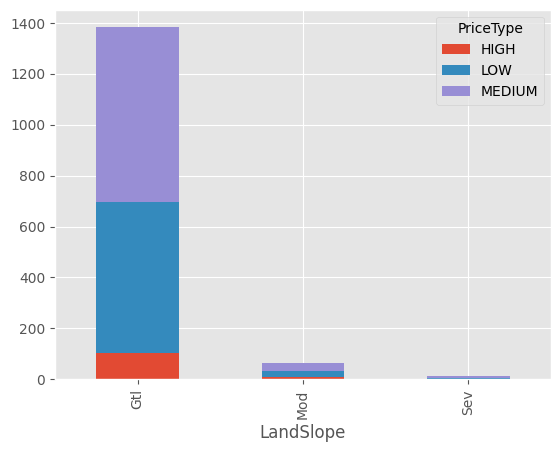

In [23]:
data_show_categorical('LandSlope')

### LotShape

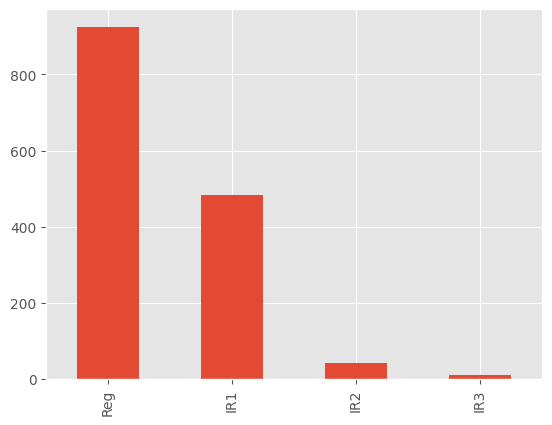

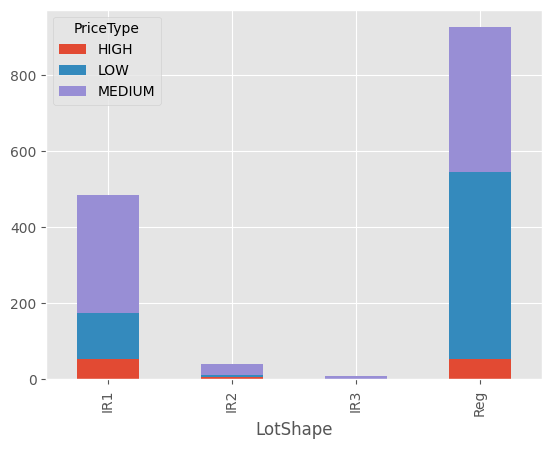

In [24]:
data_show_categorical('LotShape')

### OverallCond

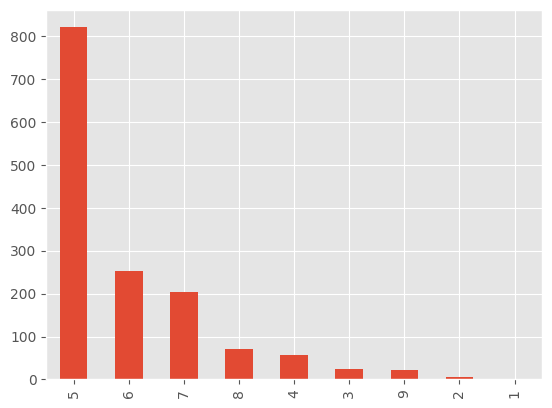

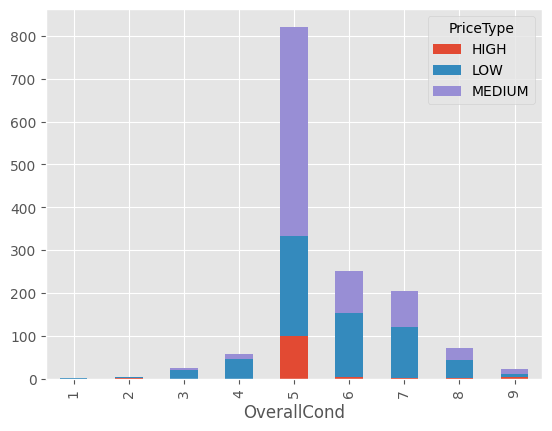

In [25]:
data_show_categorical('OverallCond')

### LotConfig

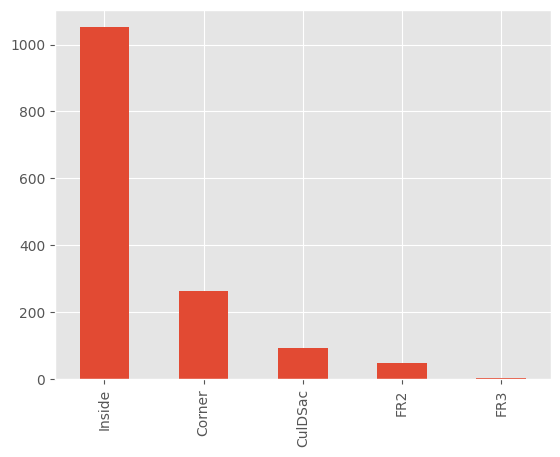

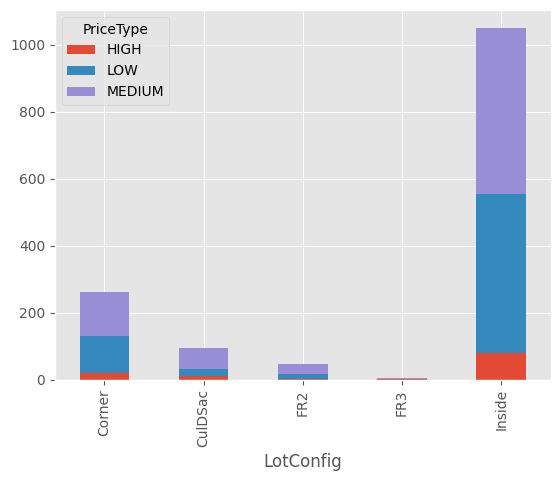

In [27]:
data_show_categorical('LotConfig')

### BldgType

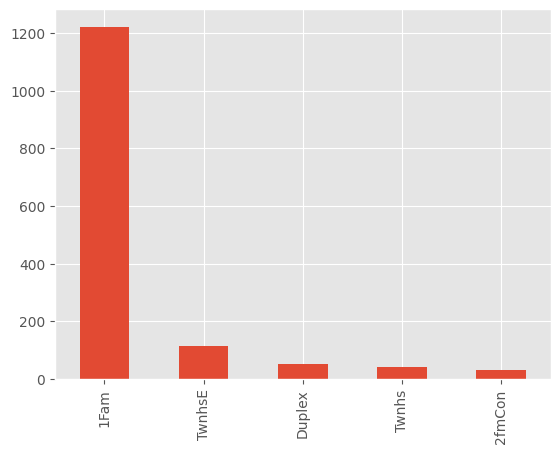

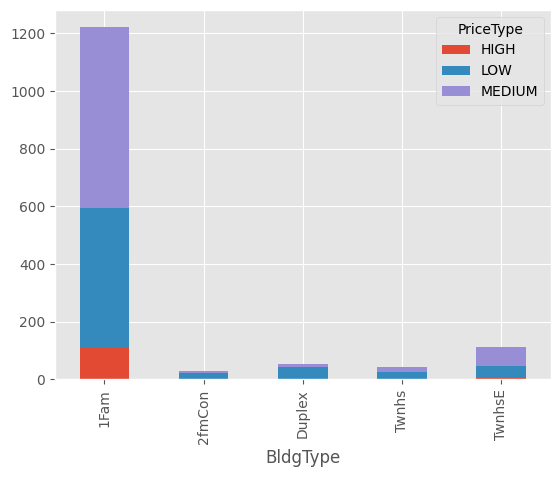

In [29]:
data_show_categorical('BldgType')

### HouseStyle

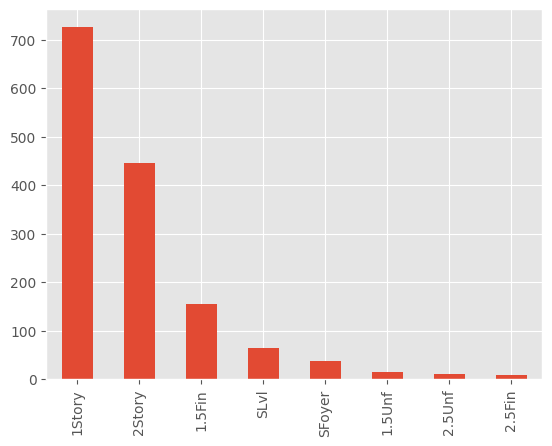

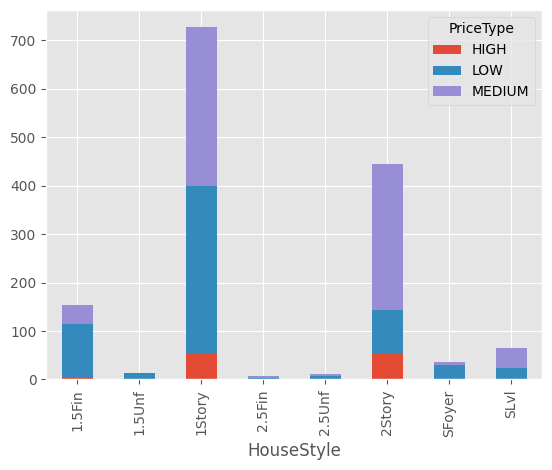

In [26]:
data_show_categorical('HouseStyle')

## Categorical interesting

### Alley

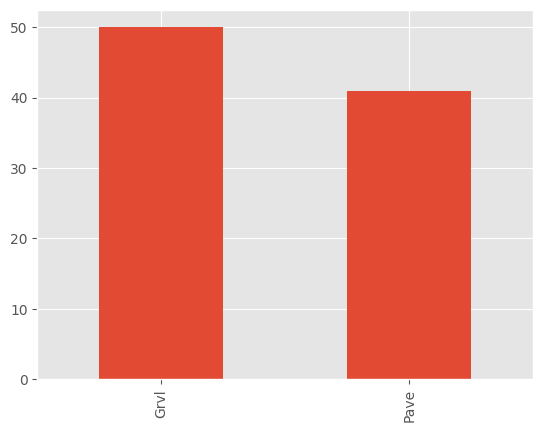

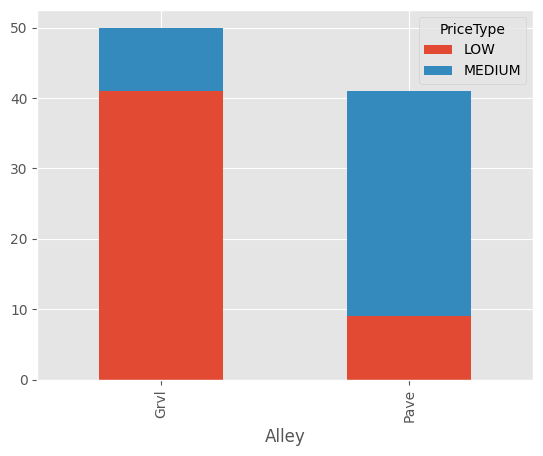

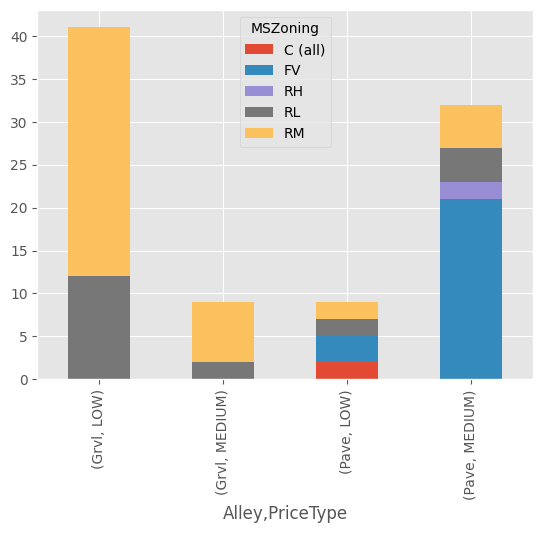

In [59]:
data_show_categorical('Alley')
#data_show_categorical_compare('Alley','MSSubClass')
data_show_categorical_compare('Alley','MSZoning')
#data_show_categorical_compare('Alley','HouseStyle')
#data_show_categorical_compare('Alley','OverallCond')
#data_show_categorical_compare('Alley','LotShape')
#data_show_categorical_compare('Alley','Neighborhood')

### OverallQual

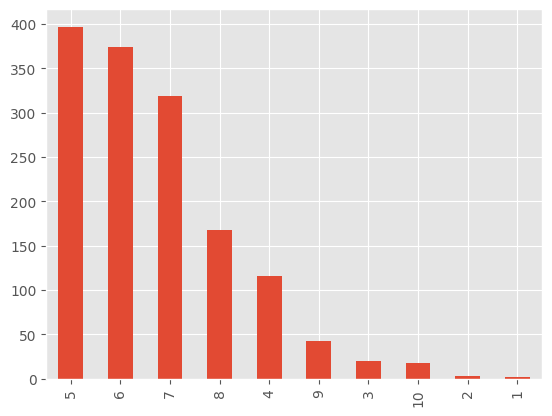

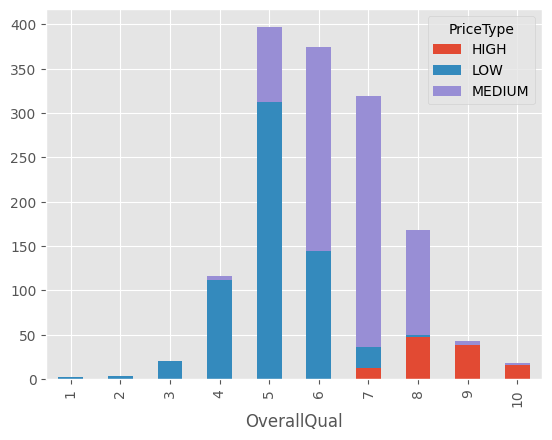

In [62]:
data_show_categorical('OverallQual')

## Numeric plot

In [45]:
def data_show_numerical(attribute):
    # first plot
    data.plot(kind = 'scatter', x = attribute, y = 'SalePrice')
    plt.show()

    # second plot
    tmp_data = data.dropna(subset=[attribute])

    xy = np.vstack([tmp_data[attribute], tmp_data['SalePrice']])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(tmp_data[attribute], tmp_data['SalePrice'], c=z, s=10)
    plt.show()

    # third plot
    data[attribute].plot.kde()

def data_show_numerical2(attribute):
    sns.catplot(x=attribute, y='PriceType', data=data, palette='ch:s=.25,rot=-.25', kind='box')
    plt.show()

def data_show_numerical_compare(attribute, attribute2, title=None):
    # sns.catplot(data=data, x=attribute, y="SalePrice", kind="swarm", title=title)
    sns.lmplot(x=attribute, y='SalePrice', data=data, hue=attribute2, fit_reg=False, palette='flare')
    plt.show()

def data_show_numerical_compare2(attribute, attribute2, title=None):
    # sns.catplot(data=data, x=attribute, y="SalePrice", kind="swarm", title=title)
    sns.catplot(x=attribute, y='PriceType', data=data, hue=attribute2, palette='dark:#5A9_r')
    plt.show()

def data_show_numerical_compare3(attribute, attribute2, title=None):
    # sns.catplot(data=data, x=attribute, y="SalePrice", kind="swarm", title=title)
    sns.catplot(x=attribute, y='PriceType', data=data, hue=attribute2, palette='ch:s=.25,rot=-.25', kind='box')
    plt.show()

## Numeric not interesting

### LotFrontage

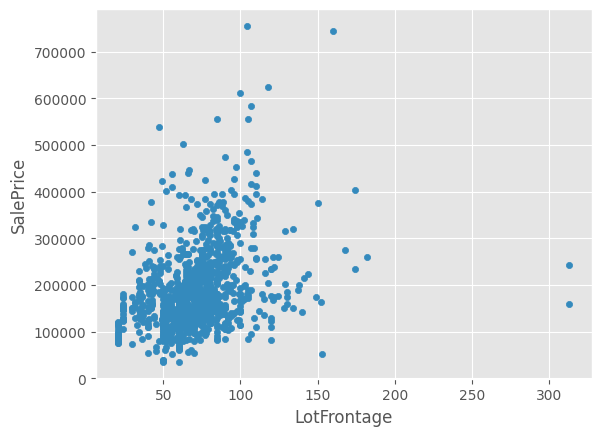

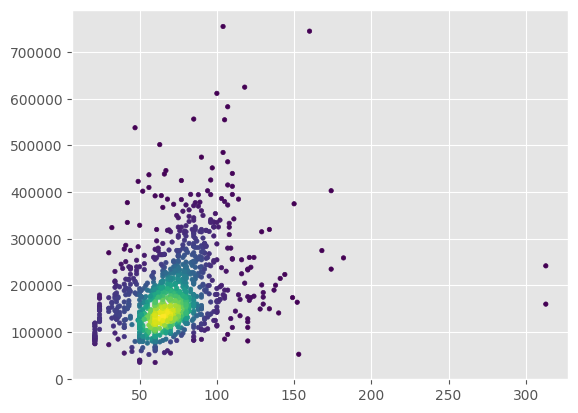

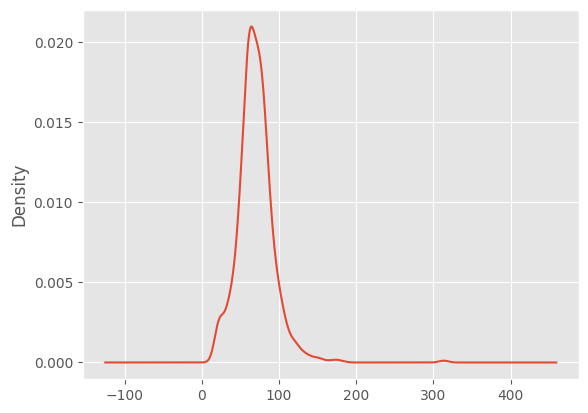

In [32]:
data_show_numerical('LotFrontage')

### LotArea

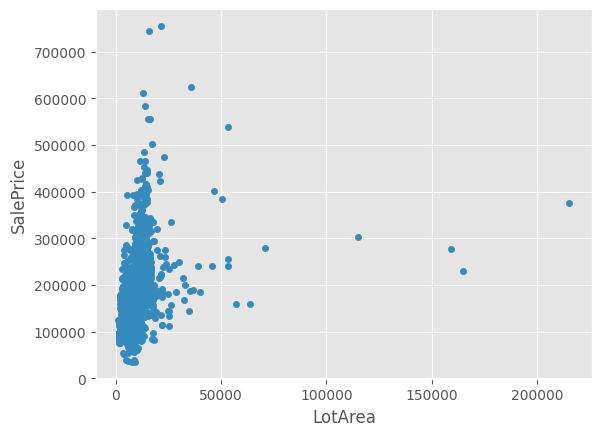

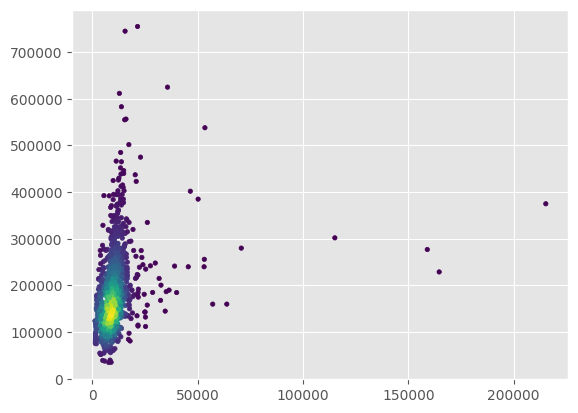

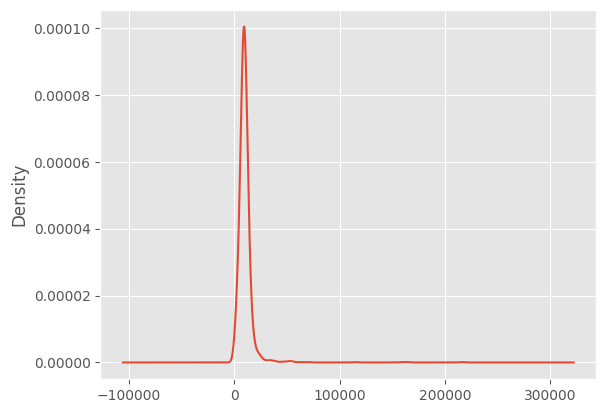

In [33]:
data_show_numerical('LotArea')

### YearRemodAdd

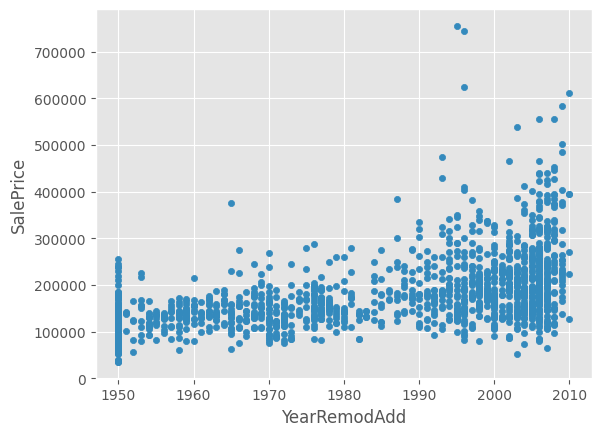

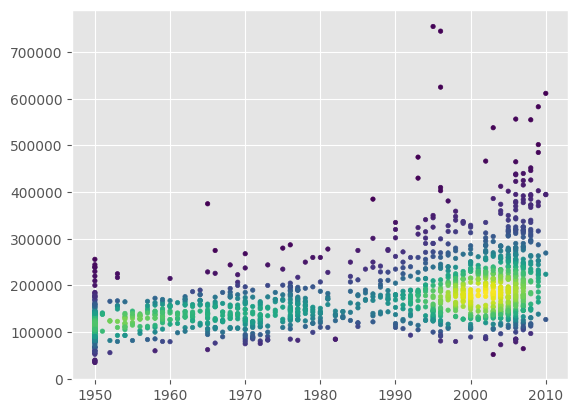

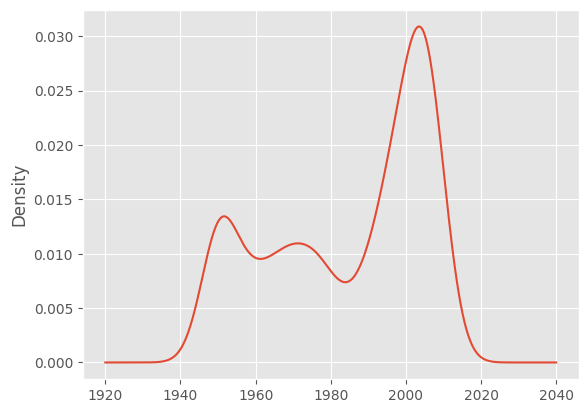

In [34]:
data_show_numerical('YearRemodAdd')

## Numeric interesting

### YearBuilt

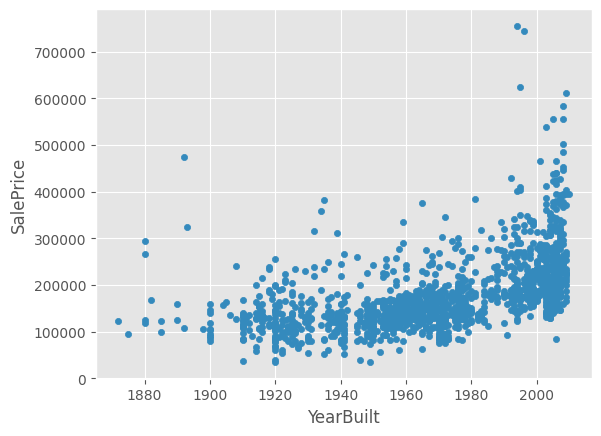

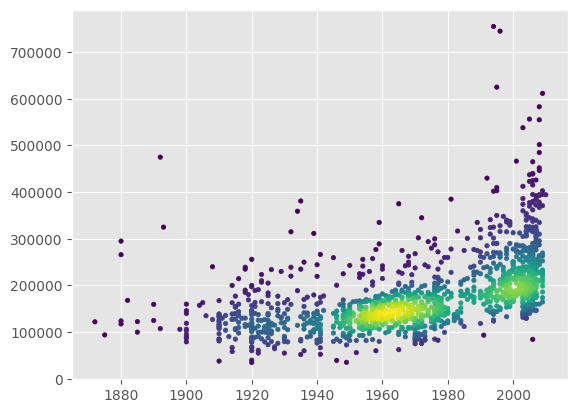

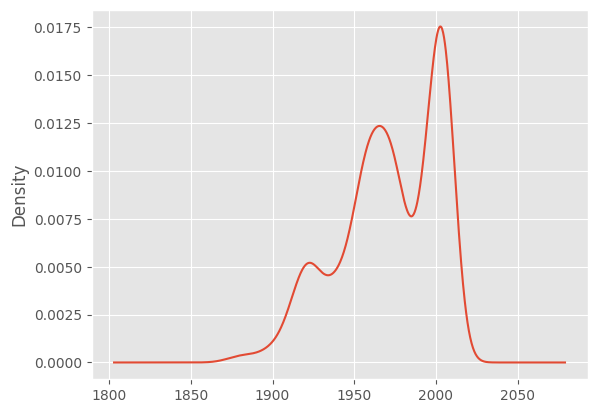

In [35]:
data_show_numerical('YearBuilt')

## Compare numerical and categorical

### Sus categorical

this section is for categorical attributes I suspect might be interesting

notice that house style and lot frontage are linked and affect prices

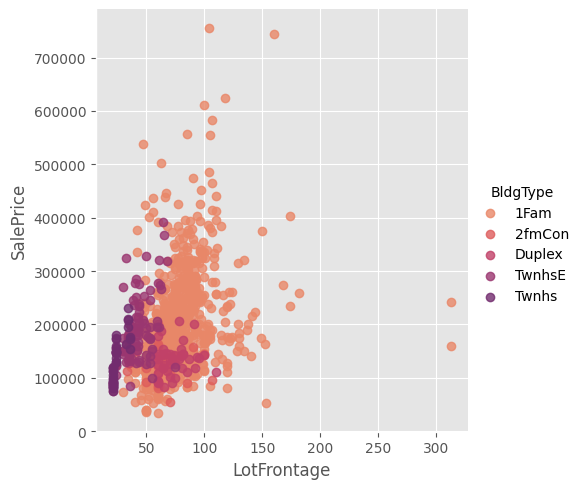

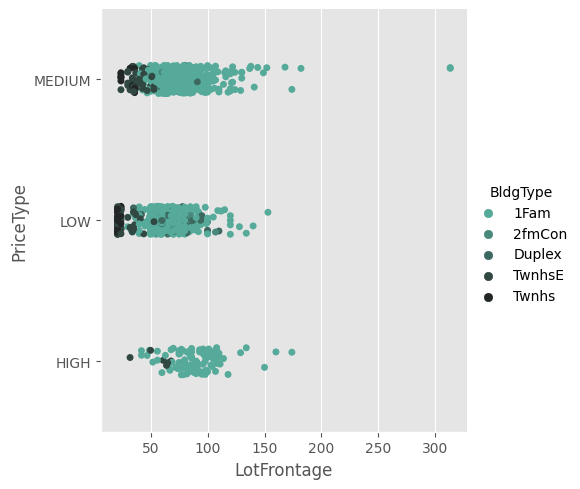

In [51]:
#data_show_numerical_compare('LotFrontage', 'LotShape')
#data_show_numerical_compare('LotFrontage', 'Neighborhood')
#data_show_numerical_compare('LotFrontage', 'Condition1')
data_show_numerical_compare('LotFrontage', 'BldgType')
#data_show_numerical_compare('LotFrontage', 'HouseStyle')
#data_show_numerical_compare('LotFrontage', 'OverallCond')
#data_show_numerical_compare('LotFrontage', 'LotConfig')
data_show_numerical_compare2('LotFrontage', 'BldgType')
#data_show_numerical_compare3('LotFrontage', 'BldgType')

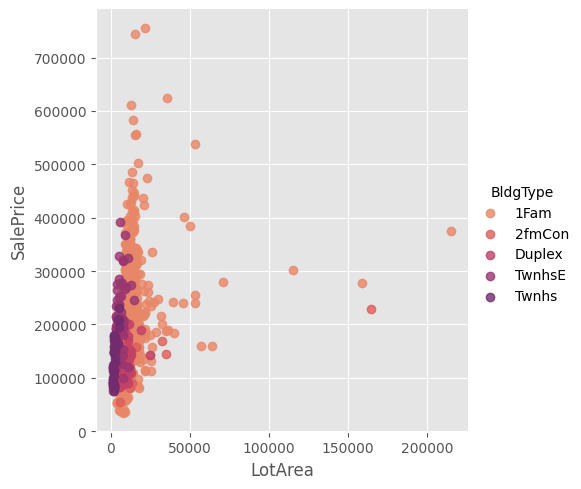

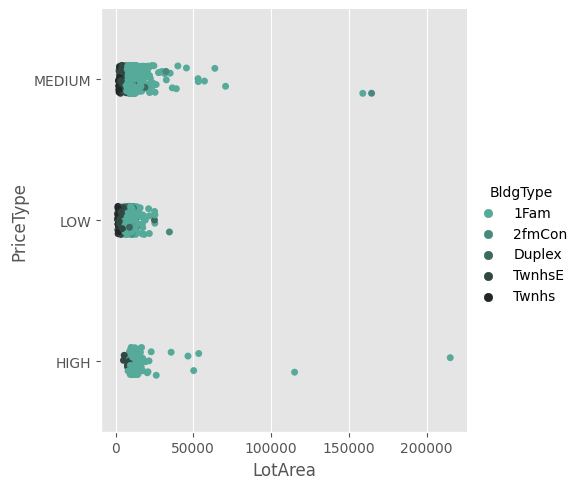

In [50]:
#data_show_numerical_compare('LotArea', 'LotShape')
#data_show_numerical_compare('LotArea', 'Neighborhood')
#data_show_numerical_compare('LotArea', 'Condition1')
data_show_numerical_compare('LotArea', 'BldgType')
#data_show_numerical_compare('LotArea', 'HouseStyle')
#data_show_numerical_compare('LotArea', 'OverallCond')
#data_show_numerical_compare('LotFrontage', 'LotConfig')
data_show_numerical_compare2('LotArea', 'BldgType')
#data_show_numerical_compare3('LotArea', 'BldgType')

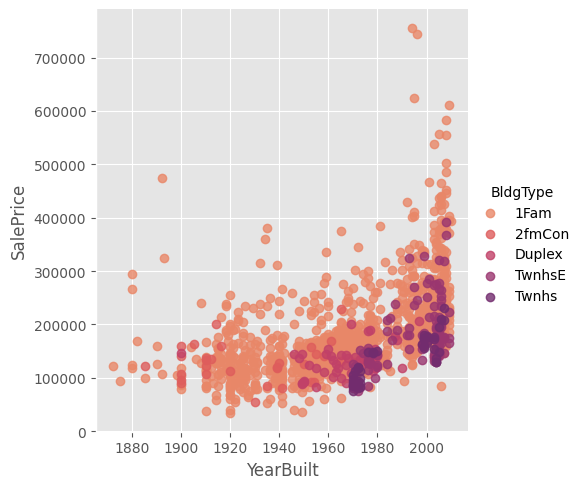

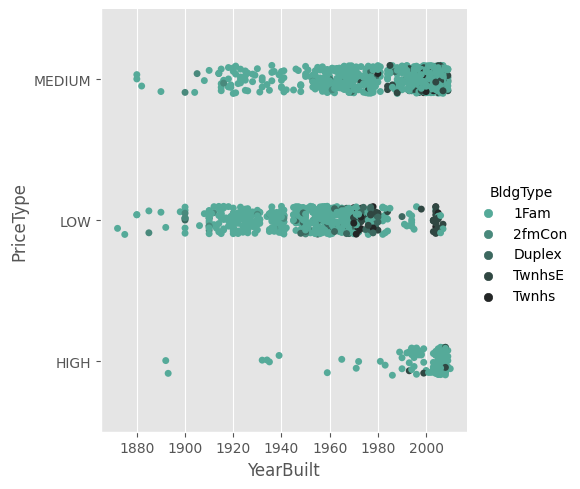

In [63]:
#data_show_numerical_compare('YearBuilt', 'LotShape')
#data_show_numerical_compare('YearBuilt', 'Neighborhood')
#data_show_numerical_compare('YearBuilt', 'Condition1')
data_show_numerical_compare('YearBuilt', 'BldgType')
#data_show_numerical_compare('YearBuilt', 'HouseStyle')
#data_show_numerical_compare('YearBuilt', 'OverallCond')
#data_show_numerical_compare('YearBuilt', 'LotConfig')
data_show_numerical_compare2('YearBuilt', 'BldgType')
#data_show_numerical_compare3('YearBuilt', 'BldgType')

In [39]:
#data_show_numerical_compare('YearRemodAdd', 'LotShape')
#data_show_numerical_compare('YearRemodAdd', 'Neighborhood')
#data_show_numerical_compare('YearRemodAdd', 'Condition1')
#data_show_numerical_compare('YearRemodAdd', 'BldgType')
#data_show_numerical_compare('YearRemodAdd', 'HouseStyle')
#data_show_numerical_compare('YearRemodAdd', 'OverallCond')
#data_show_numerical_compare('YearRemodAdd', 'LotConfig')

# Verify Data quality

## Data quality report

presence of false NA values (classified as category) and true NA values (real missing values)

data seems mostly unbalanced, with one category representing over 90% of the attribute

from the attributes __MSSubClass__ to __YearRemodAdd__ the following attributes have been retained as intersting:

- __Alley__
- __OverallQual__
- __YearBuilt__
- __potentially LotFrontage associated with BldgType__


